In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

- No null values in any column
- Hence all the columns are in object data type we need to convert it into numbers

In [5]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [6]:
for col in data.columns:
    data[col]=lb.fit_transform(data[col])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int32
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8

#### Check for duplicated rows

In [8]:
data.duplicated().sum()

0

- No duplicated rows present in dataset

#### Check the number of unique values in each columns

In [9]:
for col in data.columns:
    print(f'Unique values in column {col} = {data[col].unique()}')

Unique values in column class = [1 0]
Unique values in column cap-shape = [5 0 4 2 3 1]
Unique values in column cap-surface = [2 3 0 1]
Unique values in column cap-color = [4 9 8 3 2 5 0 7 1 6]
Unique values in column bruises = [1 0]
Unique values in column odor = [6 0 3 5 2 1 8 7 4]
Unique values in column gill-attachment = [1 0]
Unique values in column gill-spacing = [0 1]
Unique values in column gill-size = [1 0]
Unique values in column gill-color = [ 4  5  2  7 10  3  9  1  0  8 11  6]
Unique values in column stalk-shape = [0 1]
Unique values in column stalk-root = [3 2 1 4 0]
Unique values in column stalk-surface-above-ring = [2 0 1 3]
Unique values in column stalk-surface-below-ring = [2 0 3 1]
Unique values in column stalk-color-above-ring = [7 3 6 4 0 2 5 1 8]
Unique values in column stalk-color-below-ring = [7 6 3 0 4 2 8 5 1]
Unique values in column veil-type = [0]
Unique values in column veil-color = [2 0 1 3]
Unique values in column ring-number = [1 2 0]
Unique values in co

In [10]:
for col in data.columns:
    print(f'Unique values in column {col} = {len(data[col].unique())}')

Unique values in column class = 2
Unique values in column cap-shape = 6
Unique values in column cap-surface = 4
Unique values in column cap-color = 10
Unique values in column bruises = 2
Unique values in column odor = 9
Unique values in column gill-attachment = 2
Unique values in column gill-spacing = 2
Unique values in column gill-size = 2
Unique values in column gill-color = 12
Unique values in column stalk-shape = 2
Unique values in column stalk-root = 5
Unique values in column stalk-surface-above-ring = 4
Unique values in column stalk-surface-below-ring = 4
Unique values in column stalk-color-above-ring = 9
Unique values in column stalk-color-below-ring = 9
Unique values in column veil-type = 1
Unique values in column veil-color = 4
Unique values in column ring-number = 3
Unique values in column ring-type = 5
Unique values in column spore-print-color = 9
Unique values in column population = 6
Unique values in column habitat = 7


- We drop the veil-type column hence it has only single value

In [11]:
data.shape

(8124, 23)

In [12]:
data.drop(columns=['veil-type'],inplace=True)

In [13]:
data.shape

(8124, 22)

#### Statistical Description of columns

In [14]:
data.iloc[:,:11].describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000


In [15]:
data.iloc[:,11:].describe()

,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,1.109798,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.061106,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,4.000000,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


#### Correlation

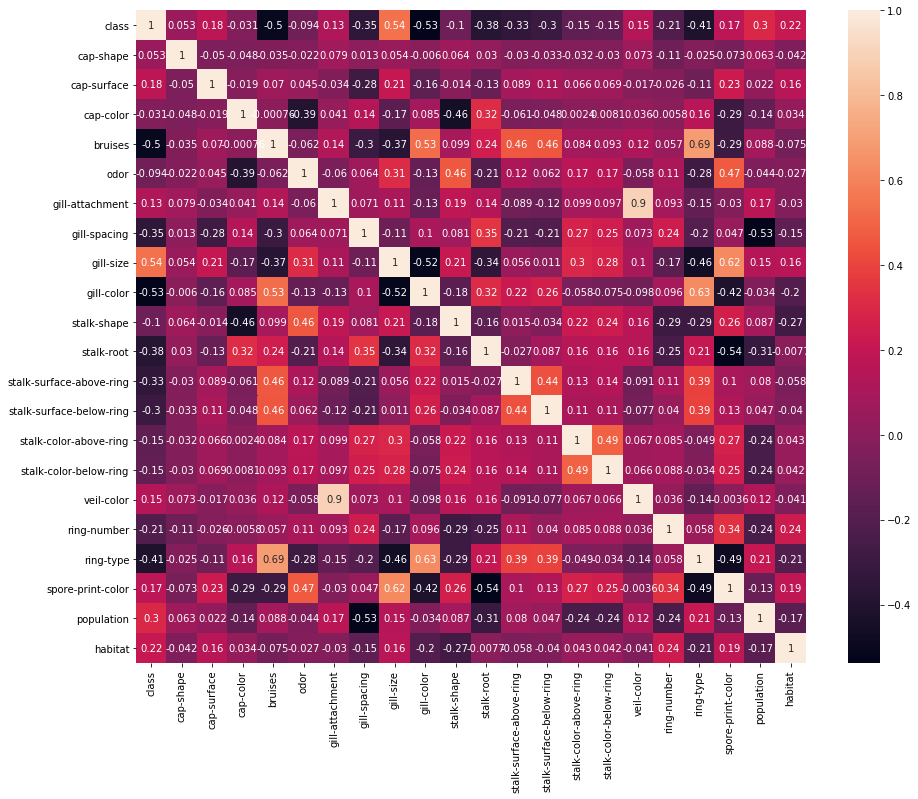

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

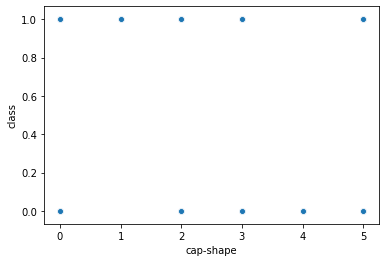

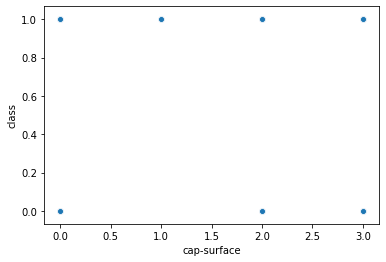

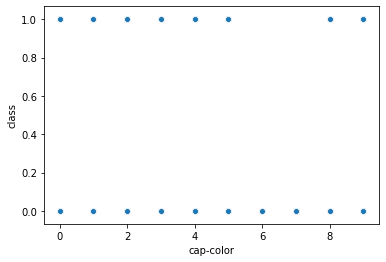

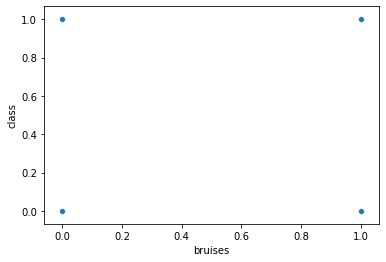

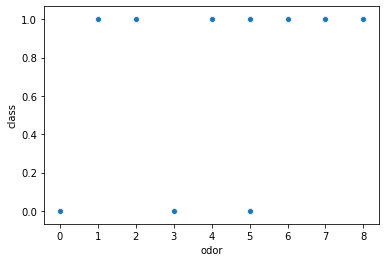

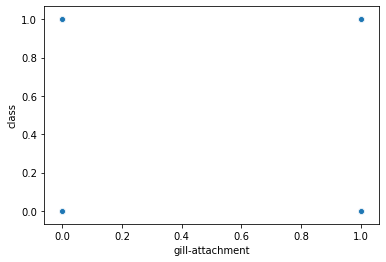

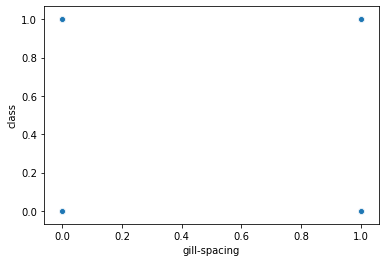

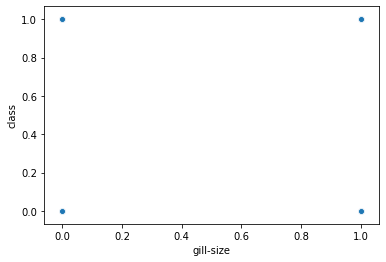

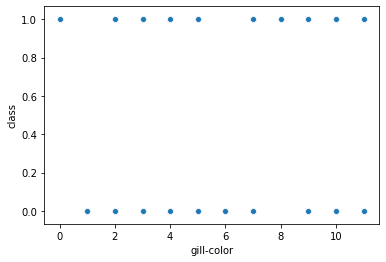

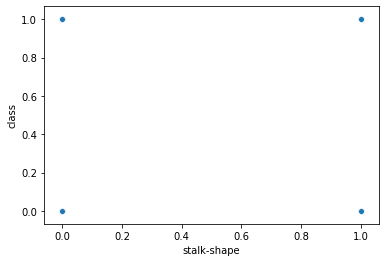

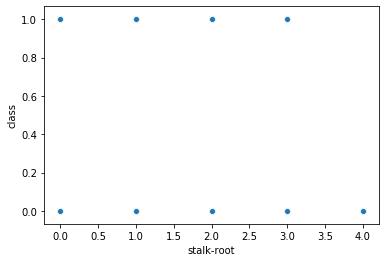

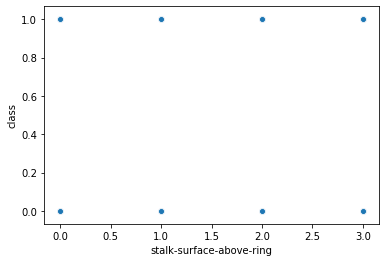

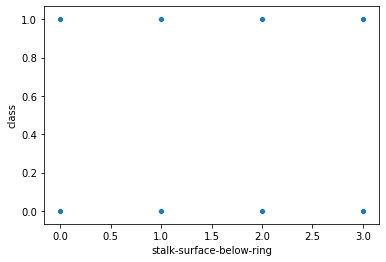

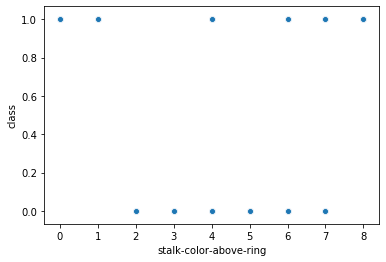

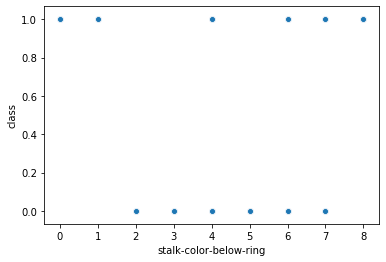

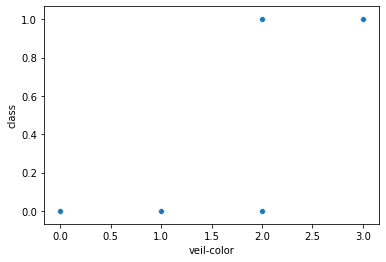

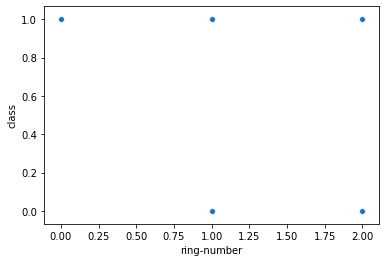

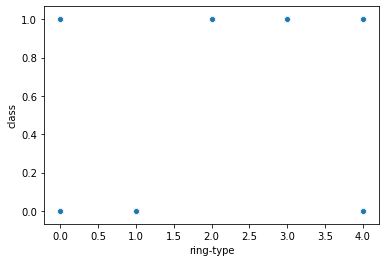

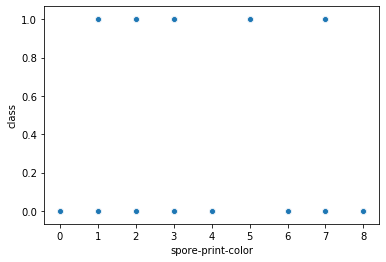

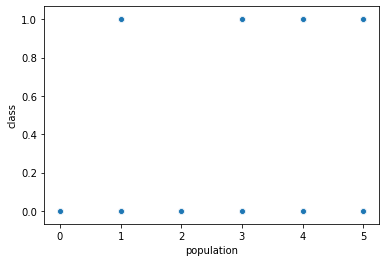

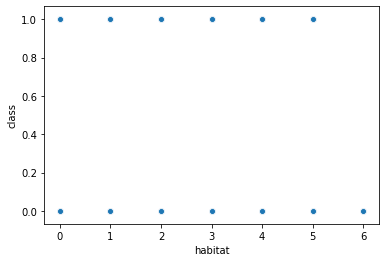

In [17]:
for col in data.iloc[:,1:].columns:
    sns.scatterplot(data[col],data['class'])
    plt.show()

#### Splitting the values into input and output

In [18]:
xdata=data.drop(columns=['class'])
xdata.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [19]:
ydata=data['class']
ydata.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

#### Finding the best random_state for train_test_split

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rmodel=RandomForestClassifier()

In [21]:
maxacc=0
maxrs=0

for rs in range(1,50):
    xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=rs)
    rmodel.fit(xtrain,ytrain)
    ypred=rmodel.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    
    if acc>maxacc:
        maxacc=acc
        maxrs=rs
        
print(f'Maximum accuracy {maxacc} is obtained at random_state = {maxrs}')

Maximum accuracy 1.0 is obtained at random_state = 1


In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=1)
xtrain.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6848,2,2,2,0,2,1,0,1,0,1,...,1,1,6,7,2,1,0,7,4,2
2246,5,3,3,1,5,1,0,0,7,1,...,2,2,3,6,2,1,4,3,4,0
2095,5,3,3,1,5,1,0,0,7,1,...,2,2,3,7,2,1,4,2,5,0
4535,2,3,9,0,2,1,0,0,3,0,...,1,1,0,6,2,1,2,1,5,0
6865,2,2,4,0,8,1,0,1,0,1,...,2,2,7,7,2,1,0,7,4,2


In [23]:
rmodel.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
ypred=rmodel.predict(xtest)

In [25]:
rmodel_acc=accuracy_score(ytest,ypred)
rmodel_acc*100

100.0

#### Checking accuracy of different model at random_state=1

In [26]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

svc_acc=accuracy_score(ytest,ypred)
svc_acc*100

98.76948318293684

In [28]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

knn_acc=accuracy_score(ytest,ypred)
knn_acc*100

99.75389663658737

In [29]:
dmodel=DecisionTreeClassifier()
dmodel.fit(xtrain,ytrain)
ypred=dmodel.predict(xtest)

dmodel_acc=accuracy_score(ytest,ypred)
dmodel_acc*100

100.0

In [30]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)

gnb_acc=accuracy_score(ytest,ypred)
gnb_acc*100

92.00164068908941

#### Checking cross_val_score of each model

In [31]:
rmodel_cross=cross_val_score(rmodel,xdata,ydata,cv=5).mean()*100
rmodel_cross

89.36154604016673

In [32]:
svc_cross=cross_val_score(svc,xdata,ydata,cv=5).mean()*100
svc_cross

84.20306934444865

In [34]:
knn_cross=cross_val_score(knn,xdata,ydata,cv=5).mean()*100
knn_cross

88.15549071618037

In [35]:
dmodel_cross=cross_val_score(dmodel,xdata,ydata,cv=5).mean()*100
dmodel_cross

96.10985979537703

In [36]:
gnb_cross=cross_val_score(gnb,xdata,ydata,cv=5).mean()*100
gnb_cross

72.59685486926865

#### Finding the best model for dataset

In [40]:
rmodel_acc*100-rmodel_cross

10.63845395983327

In [41]:
svc_acc*100-svc_cross

14.566413838488188

In [42]:
knn_acc*100-knn_cross

11.598405920407004

In [43]:
dmodel_acc*100-dmodel_cross

3.8901402046229663

In [44]:
gnb_acc*100-gnb_cross

19.40478581982076

- DecisionTreeClassifier is the best model for this dataset

#### Hyper parameter tuning on DecisionTreeClassifier

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
gsc=GridSearchCV(dmodel,{'criterion':['gini','entropy'],'max_depth':range(1,11)},cv=5)

In [47]:
gsc.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [48]:
gsc.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [49]:
dmodel=DecisionTreeClassifier(criterion='gini',max_depth=7)

In [50]:
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
dmodel.score(xtest,ytest)*100

100.0

In [52]:
cross_val_score(dmodel,xdata,ydata,cv=5).mean()

0.9556832133383857